In [1]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive
#!git clone https://github.com/lqycrystal/SolarNet_plus
%cd SolarNet_plus

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
/content/drive/MyDrive/SolarNet_plus


In [2]:
import torch
print("Is CUDA available:", torch.cuda.is_available())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0))

Is CUDA available: True
Current device: 0
Device name: NVIDIA L4


In [3]:
!python dlcode/trainsolarnet.py --root_dataset '/content/drive/MyDrive/SolarNet_plus/dlcode/wbf_data' --epochs 50

===> Loading datasets
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
===> Training model

Epoch: 1
Epoch 1: 100% 1/1 [00:02<00:00,  2.18s/it, loss=3.9430]
Testing: 100% 2/2 [00:00<00:00,  5.07it/s, loss=4.0536]
Train Loss: 3.9430, Test Loss: 4.0537
IoU (Roof Orientation): 0.1334
IoU (Superstructures): 0.0005
Figure(1000x1000)
Checkpoint saved to ./checkpoint-batchsize4-learning_rate0.001-optimizersgd/best_model.pth
Check

In [4]:
!python dlcode/predict_patch.py --pre_root_dir '/content/drive/MyDrive/SolarNet_plus/dlcode/wbf_data/test/data/'

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
number of files : 2



Roof Superstructure Maps:


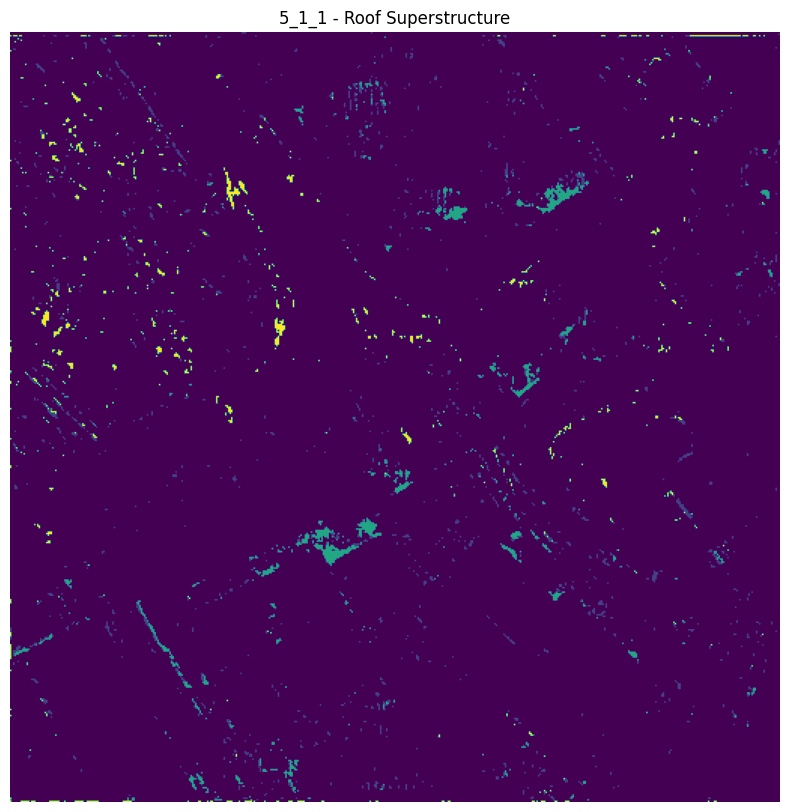

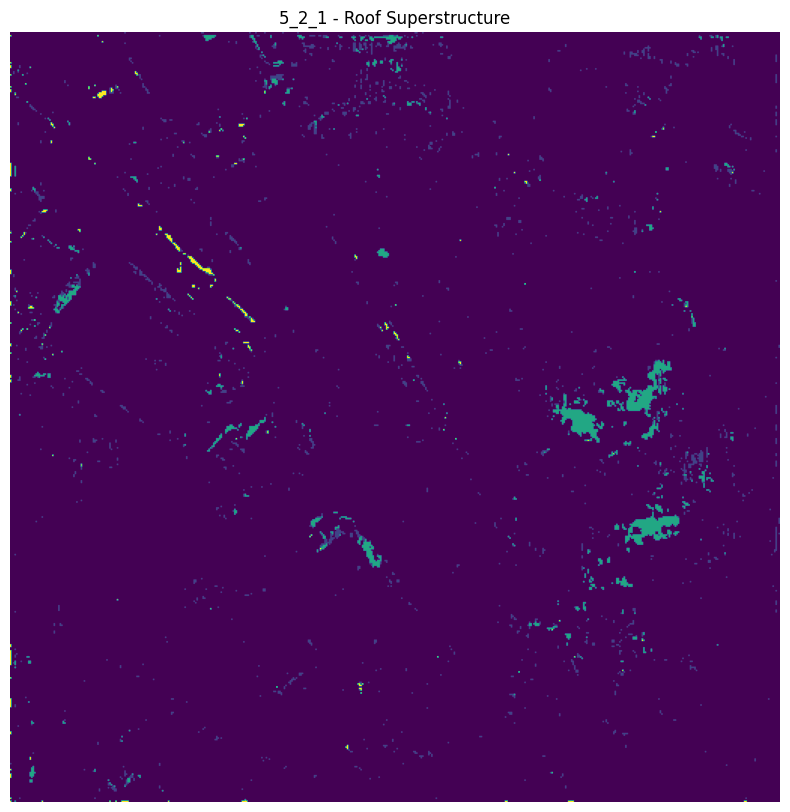

In [6]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

def show_image(file_path, title):
    plt.figure(figsize=(10, 10))
    img = plt.imread(file_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display roof superstructure maps
print("\nRoof Superstructure Maps:")
show_image("./predictionsuperstructure/5_1_1.png", "5_1_1 - Roof Superstructure")
show_image("./predictionsuperstructure/5_2_1.png", "5_2_1 - Roof Superstructure")
